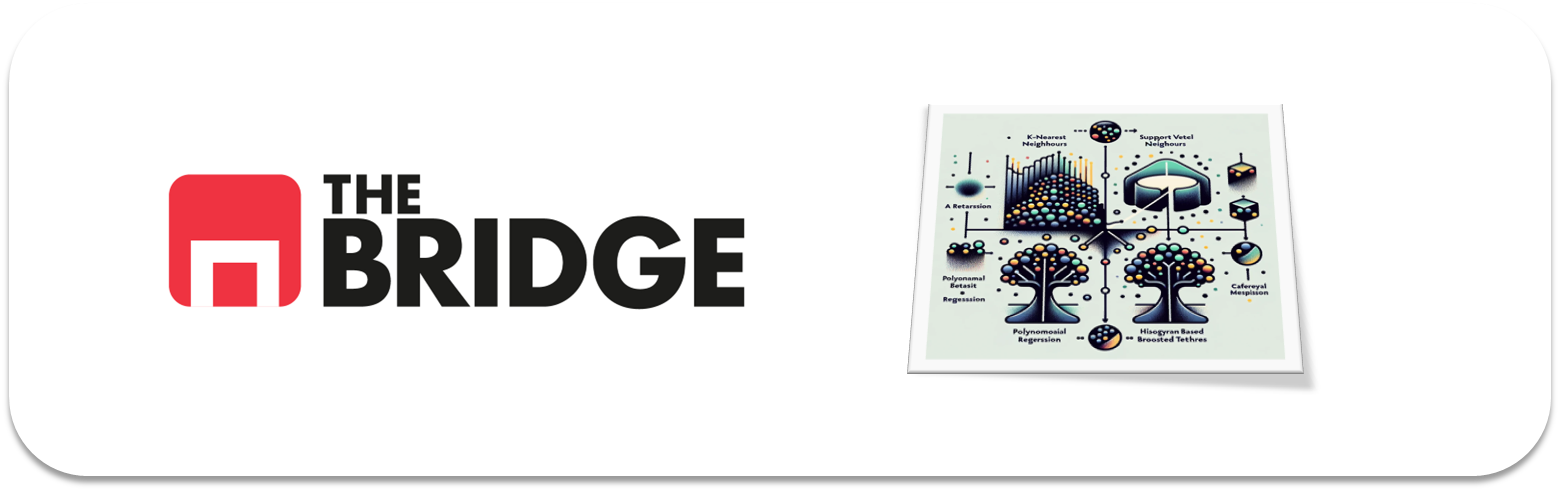

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as bt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("data/credit_npo.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

# Descripción de las variables
| **Variable**                             | **Descripción**                                                                                         |
|------------------------------------------|---------------------------------------------------------------------------------------------------------|
| `SeriousDlqin2yrs`                       | Indica si una persona tuvo un incumplimiento grave en los últimos 2 años.                               |
| `RevolvingUtilizationOfUnsecuredLines`   | Porcentaje de crédito renovable no asegurado utilizado (escala 0-1).                                    |
| `age`                                    | Edad de la persona (en años).                                                                           |
| `NumberOfTime30-59DaysPastDueNotWorse`   | Número de veces que un pago se retrasó entre 30 y 59 días.                                              |
| `DebtRatio`                              | Relación entre la deuda mensual total y el ingreso mensual.                                             |
| `MonthlyIncome`                          | Ingreso mensual del cliente.                                                                            |
| `NumberOfOpenCreditLinesAndLoans`        | Número total de líneas de crédito abiertas y préstamos.                                                 |
| `NumberOfTimes90DaysLate`                | Número de veces que un pago se retrasó al menos 90 días.                                                |
| `NumberRealEstateLoansOrLines`           | Número de préstamos o líneas de crédito relacionadas con bienes raíces.                                 |
| `NumberOfTime60-89DaysPastDueNotWorse`   | Número de veces que un pago se retrasó entre 60 y 89 días.                                              |
| `NumberOfDependents`                     | Número de personas dependientes económicamente del cliente. Contiene valores nulos.                     |

# Clasificación de las variables

| **Variable**                             | **Tipo de dato** | **Clasificación**   |
|------------------------------------------|------------------|----------------------|
| `SeriousDlqin2yrs`                       | int64            | Categórica (Target) |
| `RevolvingUtilizationOfUnsecuredLines`   | float64          | Numérica            |
| `age`                                    | int64            | Numérica            |
| `NumberOfTime30-59DaysPastDueNotWorse`   | int64            | Numérica            |
| `DebtRatio`                              | float64          | Numérica            |
| `MonthlyIncome`                          | float64          | Numérica            |
| `NumberOfOpenCreditLinesAndLoans`        | int64            | Numérica            |
| `NumberOfTimes90DaysLate`                | int64            | Numérica            |
| `NumberRealEstateLoansOrLines`           | int64            | Numérica            |
| `NumberOfTime60-89DaysPastDueNotWorse`   | int64            | Numérica            |
| `NumberOfDependents`                     | float64          | Numérica            |

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Clasificación Binaria 

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [4]:
target= "SeriousDlqin2yrs"

In [5]:
df[target].value_counts()

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

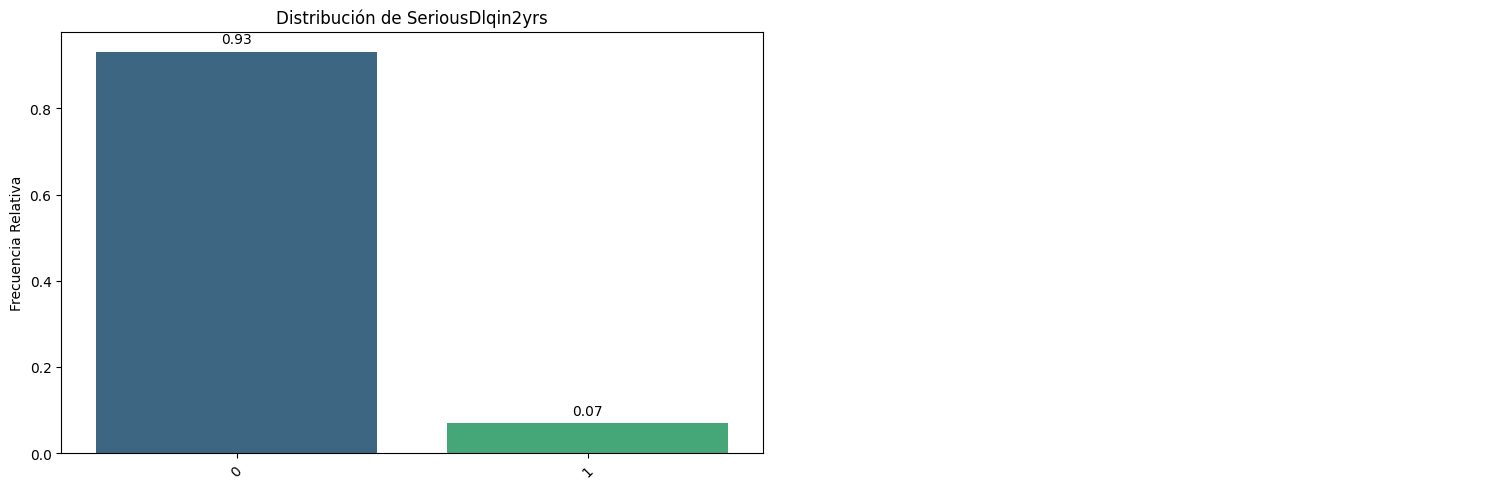

In [6]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True, relativa= True)

Claramente la variable target está desbalanceada

# Observación de las variables de nuestro dataset. "Distribución"

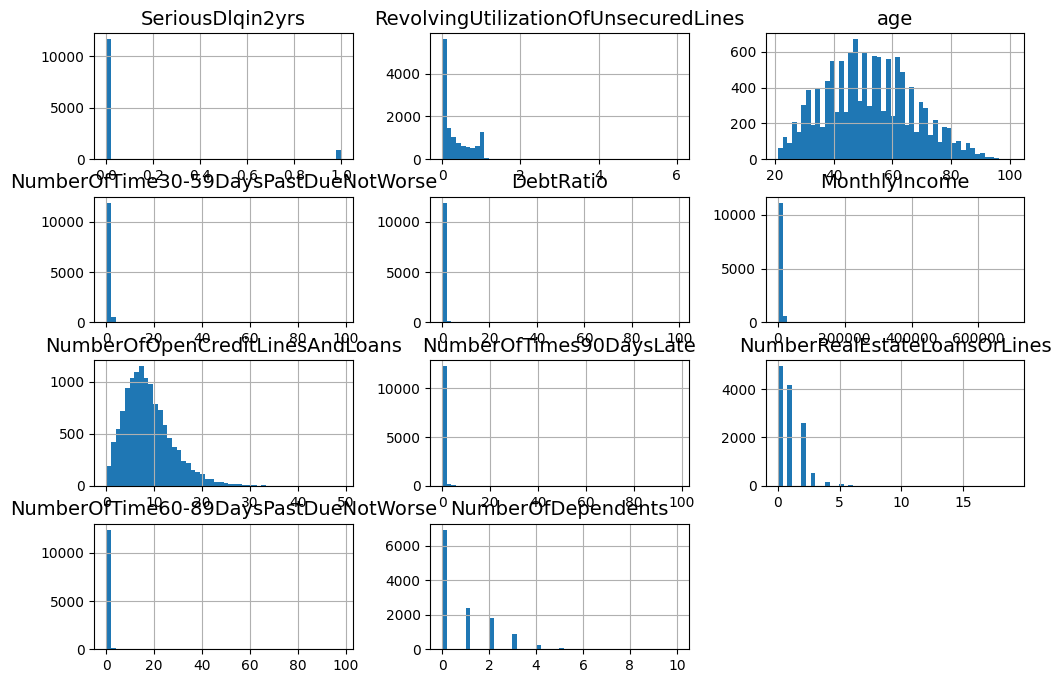

In [7]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

# Separar en Train/Test

In [8]:
df.rename(columns = {'SeriousDlqin2yrs': 'target'}, inplace=True)

In [9]:
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

# MiniEDA: Matriz de correlación

In [10]:
df_eda = X_train.copy()
df_eda["target"] = y_train.copy()

In [11]:
np.abs(df_eda.corr()['target']).sort_values(ascending=False)

target                                  1.000000
RevolvingUtilizationOfUnsecuredLines    0.285014
age                                     0.118734
NumberOfTimes90DaysLate                 0.111849
NumberOfTime30-59DaysPastDueNotWorse    0.109462
NumberOfTime60-89DaysPastDueNotWorse    0.089596
NumberOfDependents                      0.045594
DebtRatio                               0.022599
NumberOfOpenCreditLinesAndLoans         0.021952
MonthlyIncome                           0.021142
NumberRealEstateLoansOrLines            0.010861
Name: target, dtype: float64

In [12]:
corr = np.abs(df_eda.corr()['target']).sort_values(ascending=False)

# Features con menos de 0.05 de correlación vs el target
bad_corr_feat = corr[corr < 0.05].index.values

# Filtramos y eliminamos las columnas(Features) con con menos de 0.05 de correlación vs el target
df_eda.drop(columns=bad_corr_feat, inplace=True)

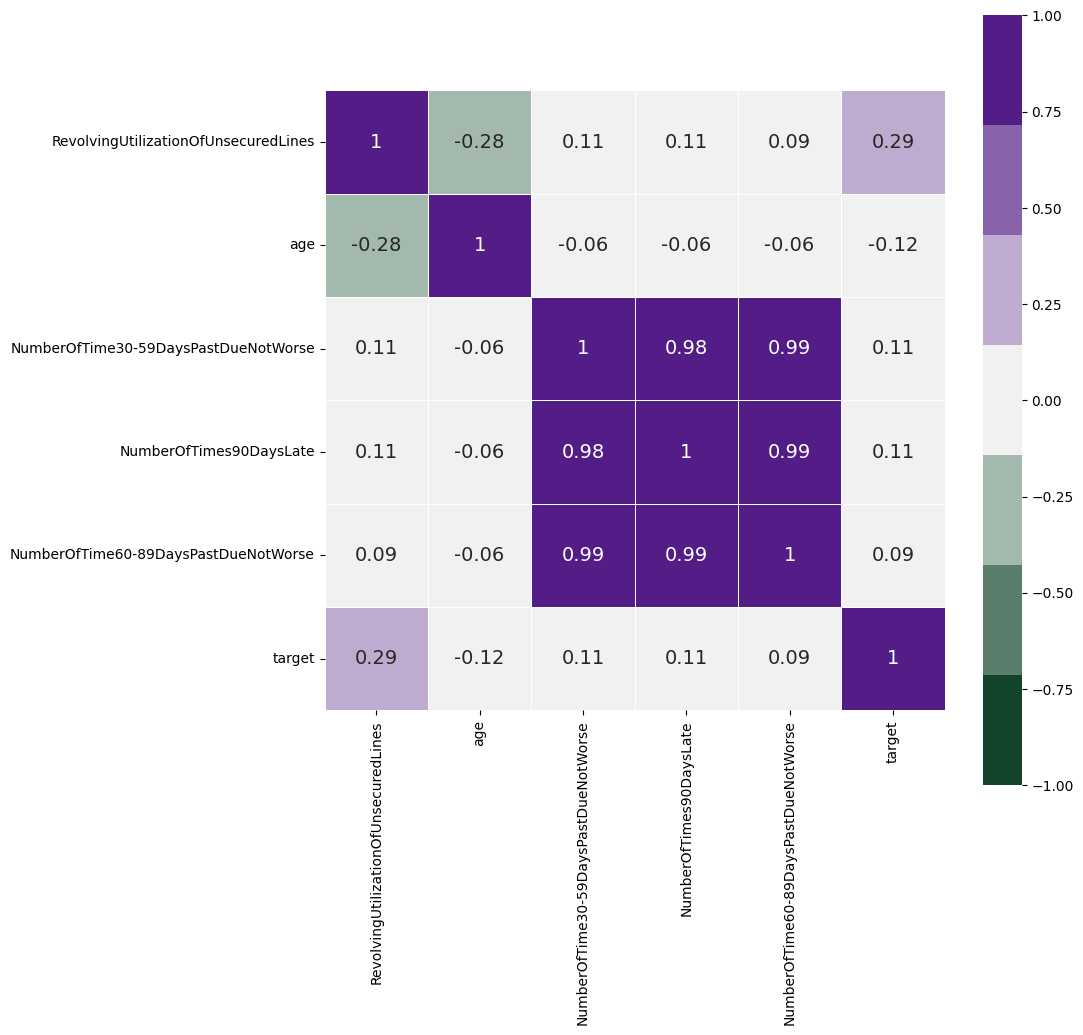

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df_eda.corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [14]:
features_num = [col for col in df_eda.columns if "target" not in col] # Resultado: lista de nombres de columnas correlación > 0.05, no incluye "target"
X_train = X_train[features_num].copy()

In [15]:
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

# Paso 1: Balanceo de Clases
Dado que la variable target está desbalanceada, utilizaremos la técnica SMOTE (Synthetic Minority Over-sampling Technique) para balancear las clases en el conjunto de entrenamiento.

In [16]:
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificamos que las clases estén balanceadas
print(y_train_res.value_counts())

target
0    9328
1    9328
Name: count, dtype: int64


# Paso 2: Modelado - KNN, Random Forest y Logistic Regression
Vamos a probar tres modelos:
- KNN (K-Nearest Neighbors)
- Random Forest
- Logistic Regression

Primero, vamos a hacer una validación cruzada para obtener una primera evaluación de estos modelos.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Modelos
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Evaluación con validación cruzada (5 folds)
cv_results = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='recall')
    cv_results[name] = cv_score.mean()
    print(f"{name} - Recall Medio: {cv_score.mean():.4f}")

KNN - Recall Medio: 0.8225
Random Forest - Recall Medio: 0.8039
Logistic Regression - Recall Medio: 0.7353


# Paso 3: Optimización de Hiperparámetros - GridSearchCV
Para el modelo que haya tenido el mejor rendimiento en la validación cruzada (basado en el recall medio), procederemos con la optimización de hiperparámetros utilizando GridSearchCV.

Ejemplo para KNN:

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Modelos
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Evaluación con validación cruzada (5 folds)
cv_results = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='recall')
    cv_results[name] = cv_score.mean()
    print(f"{name} - Recall Medio: {cv_score.mean():.4f}")

KNN - Recall Medio: 0.8225
Random Forest - Recall Medio: 0.8039
Logistic Regression - Recall Medio: 0.7353


Ejemplo para Random Forest:

In [19]:
# Definir el espacio de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV para Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='recall')
grid_rf.fit(X_train_res, y_train_res)

# Imprimir los mejores parámetros y la mejor puntuación
print(f"Mejores parámetros para Random Forest: {grid_rf.best_params_}")
print(f"Mejor Recall Medio para Random Forest: {grid_rf.best_score_:.4f}")

Mejores parámetros para Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}
Mejor Recall Medio para Random Forest: 0.8275


Ejemplo para Logistic Regression:

In [20]:
# Definir el espacio de hiperparámetros para Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV para Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='recall')
grid_lr.fit(X_train_res, y_train_res)

# Imprimir los mejores parámetros y la mejor puntuación
print(f"Mejores parámetros para Logistic Regression: {grid_lr.best_params_}")
print(f"Mejor Recall Medio para Logistic Regression: {grid_lr.best_score_:.4f}")

Mejores parámetros para Logistic Regression: {'C': 10, 'solver': 'saga'}
Mejor Recall Medio para Logistic Regression: 0.7361


# Paso 4: Evaluación del Mejor Modelo
Una vez que tenemos el mejor modelo y sus hiperparámetros optimizados, lo evaluamos en el conjunto de test.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Elegir el mejor modelo (por ejemplo, Random Forest) con los mejores parámetros
best_model = grid_rf.best_estimator_

# Evaluar el modelo en el conjunto de test
y_pred = best_model.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- DebtRatio
- MonthlyIncome
- NumberOfDependents
- NumberOfOpenCreditLinesAndLoans
- NumberRealEstateLoansOrLines


# Paso 5: Análisis de Errores
Podemos analizar los errores observando las instancias donde el modelo ha fallado, y tratar de entender si existen patrones específicos que pueden ayudarnos a mejorar el modelo.

In [ ]:
# Identificar los errores
errors = pd.DataFrame({'True Values': y_test, 'Predictions': y_pred})
errors['Error'] = errors['True Values'] != errors['Predictions']

# Mostrar los errores
errors[errors['Error'] == True].head()

# Resumen
1. Balanceo de Clases: Usamos SMOTE para balancear las clases del conjunto de entrenamiento.
2. Modelos Probados: Probamos tres modelos (KNN, Random Forest y Logistic Regression) usando validación cruzada con recall como métrica principal.
3. Optimización: Utilizamos GridSearchCV para encontrar los mejores hiperparámetros de cada modelo.
4. Evaluación Final: Evaluamos el mejor modelo en el conjunto de test y generamos un reporte de clasificación junto con la matriz de confusión.
5. Análisis de Errores: Identificamos y mostramos los casos en los que el modelo cometió errores, lo que puede ayudar a entender cómo mejorar el modelo.

Este enfoque permite encontrar el modelo más adecuado para nuestro problema de clasificación binaria y mejorar su rendimiento.